In [719]:
import numpy as np 
import pandas as pd 
#import unicodecsv as csv
import matplotlib.pyplot as plt
import seaborn as sns 
from io import StringIO

In [720]:
raw_neighb = pd.read_csv('neighbourhoods_raw.csv')
#raw_neighb

In [721]:
raw_data = pd.read_csv('berlin_train_raw.csv')
raw_data.head()
#a rar fájlt rosszul bonthatta ki legutóbb a gépem
#mostkibontás után simán be tudtam olvasni

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,16046181,https://www.airbnb.com/rooms/16046181,20210921151214,2021-09-22,Lovely maisonette with balcony in Prenzlauerberg,Welcome to our lovely maisonette! <br />Our pl...,Christburger Strasse is at the hear of the Win...,https://a0.muscache.com/pictures/05adadb0-a12b...,12028457,...,5.0,4.75,4.75,NaN,f,1,1,0,0,0.30
1,1,51482134,https://www.airbnb.com/rooms/51482134,20210921151214,2021-09-21,Geräumige 2-Zi. Wohnung in guter Lage in Berlin,Diese stilvolle Unterkunft eignet sich perfekt...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,221894358,...,5.0,5.00,5.00,NaN,f,1,1,0,0,1.00
2,2,9109580,https://www.airbnb.com/rooms/9109580,20210921151214,2021-09-22,2 Zimmer Wohnung in Neukölln,"Zwei Zimmer, ein großes Wohnzimmer mit Balkon ...",NaN,https://a0.muscache.com/pictures/62519fbb-7ce4...,47478452,...,5.0,5.00,5.00,NaN,f,1,0,1,0,0.01
3,3,19724339,https://www.airbnb.com/rooms/19724339,20210921151214,2021-09-22,GEMÜTLICHE SONNENDURCHFLUTETE DACHGESCHOSSWOHNUNG,"Sonige helle Dachgeschoss Wohnung, im Herzens ...",NaN,https://a0.muscache.com/pictures/948279d6-c101...,139041679,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
4,4,28879438,https://www.airbnb.com/rooms/28879438,20210921151214,2021-09-21,King Suite In The Center Of West Berlin,<b>The space</b><br />An old gem is polished. ...,NaN,https://a0.muscache.com/pictures/d4ef0b6b-da97...,212377709,...,NaN,NaN,NaN,NaN,t,7,0,0,0,NaN


In [722]:
data=raw_data

In [723]:
print(f"'{'host_since'}':\n", data['host_since'].value_counts())

'host_since':
 2016-12-21    61
2020-12-03    59
2013-08-19    44
2020-02-12    37
2018-08-20    34
              ..
2021-01-30     1
2010-10-05     1
2018-12-18     1
2021-07-09     1
2017-09-21     1
Name: host_since, Length: 3382, dtype: int64


In [724]:
data = data.drop(columns=['Unnamed: 0','listing_url','scrape_id','last_scraped','name','host_about','bathrooms','id','neighborhood_overview','license','host_verifications','longitude','latitude','first_review','last_review','amenities','host_since'])
data = data.drop(columns=['description','picture_url','host_id','host_url','host_name','host_location','host_thumbnail_url','host_picture_url','host_response_time','host_acceptance_rate','host_response_rate','neighbourhood','host_neighbourhood'])
#neighborhood_overview is in English and(!) German so we can not use a word sentiment model on this text
#the same with host_about
#however, they might have an additional positive effect

#data = data.dropna(subset=['host_response_rate'])

In [725]:
missing = data.isna().sum() 
missing

host_is_superhost                                 14
host_listings_count                               14
host_total_listings_count                         14
host_has_profile_pic                              14
host_identity_verified                            14
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms_text                                    18
bedrooms                                        1208
beds                                             181
price                                              0
number_of_reviews                                  0
number_of_reviews_ltm                              0
number_of_reviews_l30d                             0
review_scores_rating                            2658
review_scores_accuracy                        

# Numerics

In [726]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df2=data.select_dtypes(include=numerics)
df2
df2.isnull().sum()

host_listings_count                               14
host_total_listings_count                         14
accommodates                                       0
bedrooms                                        1208
beds                                             181
number_of_reviews                                  0
number_of_reviews_ltm                              0
number_of_reviews_l30d                             0
review_scores_rating                            2658
review_scores_accuracy                          2905
review_scores_cleanliness                       2904
review_scores_checkin                           2912
review_scores_communication                     2906
review_scores_location                          2912
review_scores_value                             2914
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms   

In [727]:
#filling in nulls with imputer
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df2['host_listings_count'].values.reshape(-1, 1))
new = imp.transform(df2['host_listings_count'].values.reshape(-1, 1))
data['host_listings_count']=new

imp.fit(df2['host_total_listings_count'].values.reshape(-1, 1))
new = imp.transform(df2['host_total_listings_count'].values.reshape(-1, 1))
data['host_total_listings_count']=new

imp.fit(df2['review_scores_rating'].values.reshape(-1, 1))
new = imp.transform(df2['review_scores_rating'].values.reshape(-1, 1))
data['review_scores_rating']=new

imp.fit(df2['review_scores_value'].values.reshape(-1, 1))
new = imp.transform(df2['review_scores_value'].values.reshape(-1, 1))
data['review_scores_value']=new

imp.fit(df2['review_scores_accuracy'].values.reshape(-1, 1))
new = imp.transform(df2['review_scores_accuracy'].values.reshape(-1, 1))
data['review_scores_accuracy']=new

imp.fit(df2['review_scores_cleanliness'].values.reshape(-1, 1))
new = imp.transform(df2['review_scores_cleanliness'].values.reshape(-1, 1))
data['review_scores_cleanliness']=new

imp.fit(df2['review_scores_checkin'].values.reshape(-1, 1))
new = imp.transform(df2['review_scores_checkin'].values.reshape(-1, 1))
data['review_scores_checkin']=new

imp.fit(df2['review_scores_communication'].values.reshape(-1, 1))
new = imp.transform(df2['review_scores_communication'].values.reshape(-1, 1))
data['review_scores_communication']=new

imp.fit(df2['review_scores_location'].values.reshape(-1, 1))
new = imp.transform(df2['review_scores_location'].values.reshape(-1, 1))
data['review_scores_location']=new

In [728]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df2[['number_of_reviews', 'reviews_per_month']])
new = imp.transform(df2[['number_of_reviews', 'reviews_per_month']])
data[['number_of_reviews', 'reviews_per_month']]=pd.DataFrame(new)

In [729]:
pd.DataFrame(new).head(10)

,0,1
0,4.0,0.300000
1,1.0,1.000000
2,1.0,0.010000
3,0.0,0.362177
4,0.0,0.362177
5,66.0,1.000000
6,26.0,0.810000
7,7.0,0.090000
8,2.0,0.050000
9,2.0,0.080000


In [730]:
print(f"'{'accommodates'}':\n", data['accommodates'].value_counts()) 

'accommodates':
 2     7165
4     2064
1     1648
3     1527
6      503
5      450
8      118
7       93
10      49
9       28
12      21
16      16
11       9
14       9
13       9
0        4
15       3
Name: accommodates, dtype: int64


In [731]:
vcs = pd.DataFrame(df2['accommodates'].value_counts())
TH = 510 #more than 5 people (0: 4??? other)
other_list = vcs[vcs.accommodates<TH].index.tolist()
temp_col = df2['accommodates'].copy()
temp_col.loc[temp_col.isin(other_list)] = 'Other'
temp_col

0            3
1        Other
2            2
3            2
4            2
         ...  
13711        2
13712        2
13713        4
13714        2
13715        3
Name: accommodates, Length: 13716, dtype: object

In [732]:
data['accommodates']=temp_col #categorical

In [733]:
#data['accommodates']=temp_col #categorical
print(f"'{'bedrooms'}':\n", data['bedrooms'].value_counts()) 
print(f"'{'accommodates'}':\n", data['accommodates'].value_counts()) 

'bedrooms':
 1.0     9953
2.0     1898
3.0      505
4.0      115
5.0       25
6.0        5
7.0        3
9.0        1
8.0        1
10.0       1
12.0       1
Name: bedrooms, dtype: int64
'accommodates':
 2        7165
4        2064
1        1648
3        1527
Other    1312
Name: accommodates, dtype: int64


In [734]:
vcs = pd.DataFrame(df2['bedrooms'].value_counts())
TH = 500 #more than 3 bedrooms
other_list = vcs[vcs.bedrooms<TH].index.tolist()
temp_col = df2['bedrooms'].copy()
temp_col.loc[temp_col.isin(other_list)] = 'Other'
data['bedrooms']=temp_col #categorical
#print(f"'{'bedrooms'}':\n", data['bedrooms'].value_counts())
print(f"'{'beds'}':\n", data['beds'].value_counts())

print(f"'{'bathrooms_text'}':\n", data['bathrooms_text'].value_counts()) 
vcs = pd.DataFrame(df3['bathrooms_text'].value_counts())
TH = 600 #more than 5 people (0: 4??? other)
other_list = vcs[vcs.bathrooms_text<TH].index.tolist()
temp_col = df3['bathrooms_text'].copy()
temp_col.loc[temp_col.isin(other_list)] = 'Other'
data['bathrooms_text']=temp_col

'beds':
 1.0     7863
2.0     3211
3.0      928
0.0      550
4.0      529
5.0      178
6.0      145
7.0       45
8.0       40
10.0      16
9.0       14
11.0       6
12.0       4
15.0       2
17.0       2
14.0       2
Name: beds, dtype: int64
'bathrooms_text':
 1 bath               7650
1 shared bath        3274
1 private bath        777
2 baths               614
1.5 baths             588
1.5 shared baths      332
2 shared baths        193
2.5 baths              94
3 baths                31
0 baths                30
Half-bath              29
0 shared baths         20
2.5 shared baths       16
Shared half-bath       13
Private half-bath      11
4 baths                 7
3 shared baths          3
4.5 shared baths        3
8.5 shared baths        3
7 baths                 2
3.5 baths               2
4 shared baths          2
8 baths                 1
4.5 baths               1
7.5 baths               1
5 baths                 1
Name: bathrooms_text, dtype: int64


In [735]:

data['bathrooms_text']=data['bathrooms_text'].fillna('1 bath')
data['bedrooms']=data['bedrooms'].fillna(1)
#most frequent
#0: no bed? 

vcs = pd.DataFrame(df2['beds'].value_counts())
TH = 540 #more than 3 beds
other_list = vcs[vcs.beds<TH].index.tolist()
temp_col = df2['beds'].copy()
temp_col.loc[temp_col.isin(other_list)] = 'Other'
data['beds']=temp_col #categorical
print(f"'{'beds'}':\n", data['beds'].value_counts())
data['beds']=data['beds'].fillna(1)

'beds':
 1.0      7863
2.0      3211
Other     983
3.0       928
0.0       550
Name: beds, dtype: int64


In [736]:
df3=data.select_dtypes(include=['object'])
df3.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,instant_bookable
0,f,t,t,Prenzlauer Berg Süd,Pankow,Entire rental unit,Entire home/apt,3,1 bath,1,2,$76.00,f
1,f,t,t,Westend,Charlottenburg-Wilm.,Entire rental unit,Entire home/apt,Other,1 bath,2,3,$70.00,f
2,f,t,f,Neuköllner Mitte/Zentrum,Neukölln,Private room in rental unit,Private room,2,1 bath,1,1,$40.00,f
3,f,f,f,Mariendorf,Tempelhof - Schöneberg,Private room in rental unit,Private room,2,1 bath,1,Other,$39.00,t
4,f,t,f,Kurfürstendamm,Charlottenburg-Wilm.,Room in boutique hotel,Hotel room,2,1 bath,1,1,"$2,025.00",t


In [737]:
df3.isnull().sum()

host_is_superhost               14
host_has_profile_pic            14
host_identity_verified          14
neighbourhood_cleansed           0
neighbourhood_group_cleansed     0
property_type                    0
room_type                        0
accommodates                     0
bathrooms_text                   0
bedrooms                         0
beds                             0
price                            0
instant_bookable                 0
dtype: int64

In [738]:
print(f"'{'host_identity_verified'}':\n", data['host_identity_verified'].value_counts())
print(f"'{'host_has_profile_pic'}':\n", data['host_has_profile_pic'].value_counts())
print(f"'{'host_is_superhost'}':\n", data['host_is_superhost'].value_counts())

'host_identity_verified':
 t    10816
f     2886
Name: host_identity_verified, dtype: int64
'host_has_profile_pic':
 t    13636
f       66
Name: host_has_profile_pic, dtype: int64
'host_is_superhost':
 f    11564
t     2138
Name: host_is_superhost, dtype: int64


In [739]:
data['host_identity_verified']=data['host_identity_verified'].fillna('t')
data['host_has_profile_pic']=data['host_has_profile_pic'].fillna('t')
data['host_is_superhost']=data['host_is_superhost'].fillna('f')
print(f"'{'host_is_superhost'}':\n", data['host_is_superhost'].value_counts())

'host_is_superhost':
 f    11578
t     2138
Name: host_is_superhost, dtype: int64


In [740]:
print(f"'{'neighbourhood_group_cleansed'}':\n", data['neighbourhood_group_cleansed'].value_counts())
vcs = pd.DataFrame(df3['neighbourhood_group_cleansed'].value_counts())
TH = 500
other_list = vcs[vcs['neighbourhood_group_cleansed']<TH].index.tolist()
temp_col = df3['neighbourhood_group_cleansed'].copy()
temp_col.loc[temp_col.isin(other_list)] = 'Other'
data['neighbourhood_group_cleansed']=temp_col
print(f"'{'neighbourhood_group_cleansed'}':\n", data['neighbourhood_group_cleansed'].value_counts())

'neighbourhood_group_cleansed':
 Friedrichshain-Kreuzberg    3037
Mitte                       2974
Pankow                      2130
Neukölln                    1888
Charlottenburg-Wilm.        1106
Tempelhof - Schöneberg       925
Treptow - Köpenick           479
Lichtenberg                  468
Steglitz - Zehlendorf        301
Reinickendorf                199
Spandau                      106
Marzahn - Hellersdorf        103
Name: neighbourhood_group_cleansed, dtype: int64
'neighbourhood_group_cleansed':
 Friedrichshain-Kreuzberg    3037
Mitte                       2974
Pankow                      2130
Neukölln                    1888
Other                       1656
Charlottenburg-Wilm.        1106
Tempelhof - Schöneberg       925
Name: neighbourhood_group_cleansed, dtype: int64


In [741]:
print(f"'{'neighbourhood_cleansed'}':\n", data['neighbourhood_cleansed'].value_counts())
vcs = pd.DataFrame(df3['neighbourhood_cleansed'].value_counts())
TH = 500
other_list = vcs[vcs['neighbourhood_cleansed']<TH].index.tolist()
temp_col = df3['neighbourhood_cleansed'].copy()
temp_col.loc[temp_col.isin(other_list)] = 'Other'
data['neighbourhood_cleansed']=temp_col
print(f"'{'neighbourhood_cleansed'}':\n", data['neighbourhood_cleansed'].value_counts())
data = data.drop(columns=['neighbourhood_cleansed'])

'neighbourhood_cleansed':
 Alexanderplatz               760
Frankfurter Allee Süd FK     745
Tempelhofer Vorstadt         685
Reuterstraße                 554
Brunnenstr. Süd              512
                            ... 
Hellersdorf-Süd                2
Buckow Nord                    2
Neu-Hohenschönhausen Süd       2
Neu-Hohenschönhausen Nord      1
Marzahn-Nord                   1
Name: neighbourhood_cleansed, Length: 137, dtype: int64
'neighbourhood_cleansed':
 Other                       10460
Alexanderplatz                760
Frankfurter Allee Süd FK      745
Tempelhofer Vorstadt          685
Reuterstraße                  554
Brunnenstr. Süd               512
Name: neighbourhood_cleansed, dtype: int64


In [742]:
print(f"'{'property_type'}':\n", data['property_type'].value_counts())
print(f"'{'room_type'}':\n", data['room_type'].value_counts()) #rrom type is OK

'property_type':
 Entire rental unit             6569
Private room in rental unit    4904
Entire condominium (condo)      355
Entire serviced apartment       269
Entire loft                     251
                               ... 
Castle                            1
Bus                               1
Private room in tipi              1
Casa particular                   1
Private room in floor             1
Name: property_type, Length: 64, dtype: int64
'room_type':
 Entire home/apt    7755
Private room       5672
Shared room         164
Hotel room          125
Name: room_type, dtype: int64


In [743]:
vcs = pd.DataFrame(df3['property_type'].value_counts())
TH = 250
other_list = vcs[vcs.property_type<TH].index.tolist()
temp_col = df3['property_type'].copy()
temp_col.loc[temp_col.isin(other_list)] = 'Other'
data['property_type']=temp_col
temp_col

0                 Entire rental unit
1                 Entire rental unit
2        Private room in rental unit
3        Private room in rental unit
4                              Other
                    ...             
13711    Private room in rental unit
13712    Private room in rental unit
13713    Private room in rental unit
13714    Private room in rental unit
13715    Private room in rental unit
Name: property_type, Length: 13716, dtype: object

In [744]:

print(f"'{'property_type'}':\n", data['property_type'].value_counts())

'property_type':
 Entire rental unit             6569
Private room in rental unit    4904
Other                          1368
Entire condominium (condo)      355
Entire serviced apartment       269
Entire loft                     251
Name: property_type, dtype: int64


# Price

In [745]:
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [746]:
df2=data.select_dtypes(include=numerics)
df2

,host_listings_count,host_total_listings_count,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,1.0,76.0,4.0,0,0,4.75,4.75,4.75,5.00,5.00,4.75,4.75,1,1,0,0,0.300000
1,0.0,0.0,70.0,1.0,1,1,5.00,3.00,3.00,5.00,5.00,5.00,5.00,1,1,0,0,1.000000
2,1.0,1.0,40.0,1.0,0,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1,0,1,0,0.010000
3,1.0,1.0,39.0,0.0,0,0,4.85,4.92,4.80,4.96,4.97,4.88,4.76,1,0,1,0,0.362177
4,7.0,7.0,2025.0,0.0,0,0,4.85,4.92,4.80,4.96,4.97,4.88,4.76,7,0,0,0,0.362177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13711,0.0,0.0,49.0,2.0,2,0,5.00,5.00,4.50,5.00,5.00,5.00,5.00,1,0,1,0,1.540000
13712,1.0,1.0,23.0,22.0,0,0,4.95,5.00,5.00,5.00,5.00,4.77,4.91,1,0,1,0,0.460000
13713,2.0,2.0,40.0,59.0,0,0,4.69,4.66,4.86,4.80,4.83,4.76,4.61,2,0,2,0,1.330000
13714,1.0,1.0,40.0,0.0,0,0,4.85,4.92,4.80,4.96,4.97,4.88,4.76,1,0,1,0,0.362177


In [747]:
df3=data.select_dtypes(include=['object'])
df3
pd.get_dummies(df3)

,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,neighbourhood_group_cleansed_Charlottenburg-Wilm.,neighbourhood_group_cleansed_Friedrichshain-Kreuzberg,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,...,bedrooms_2.0,bedrooms_3.0,bedrooms_Other,beds_0.0,beds_1.0,beds_2.0,beds_3.0,beds_Other,instant_bookable_f,instant_bookable_t
0,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,1,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13711,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
13712,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
13713,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
13714,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [748]:
df2= df2[df2['price'] != 0]

In [749]:
data = df2.join(pd.get_dummies(df3))
data.head()
# 13710 rows for data

,host_listings_count,host_total_listings_count,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,bedrooms_2.0,bedrooms_3.0,bedrooms_Other,beds_0.0,beds_1.0,beds_2.0,beds_3.0,beds_Other,instant_bookable_f,instant_bookable_t
0,1.0,1.0,76.0,4.0,0,0,4.75,4.75,4.75,5.00,...,0,0,0,0,0,1,0,0,1,0
1,0.0,0.0,70.0,1.0,1,1,5.00,3.00,3.00,5.00,...,1,0,0,0,0,0,1,0,1,0
2,1.0,1.0,40.0,1.0,0,0,5.00,5.00,5.00,5.00,...,0,0,0,0,1,0,0,0,1,0
3,1.0,1.0,39.0,0.0,0,0,4.85,4.92,4.80,4.96,...,0,0,0,0,0,0,0,1,0,1
4,7.0,7.0,2025.0,0.0,0,0,4.85,4.92,4.80,4.96,...,0,0,0,0,1,0,0,0,0,1


In [750]:
X = data[data.columns.difference(['price'])]
y = np.log(data['price'])

9.0

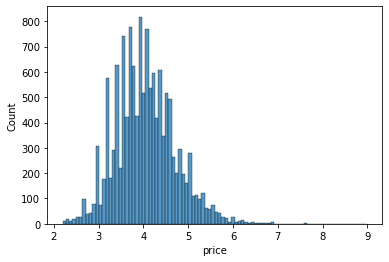

In [751]:
plt.figure(figsize=(6,4))
sns.histplot(x=y, data = data)
min(data['price'])

In [752]:
from sklearn.linear_model import LinearRegression
classic_regression = LinearRegression().fit(X, y)
classic_regression.score(X,y)

0.5321890470607022

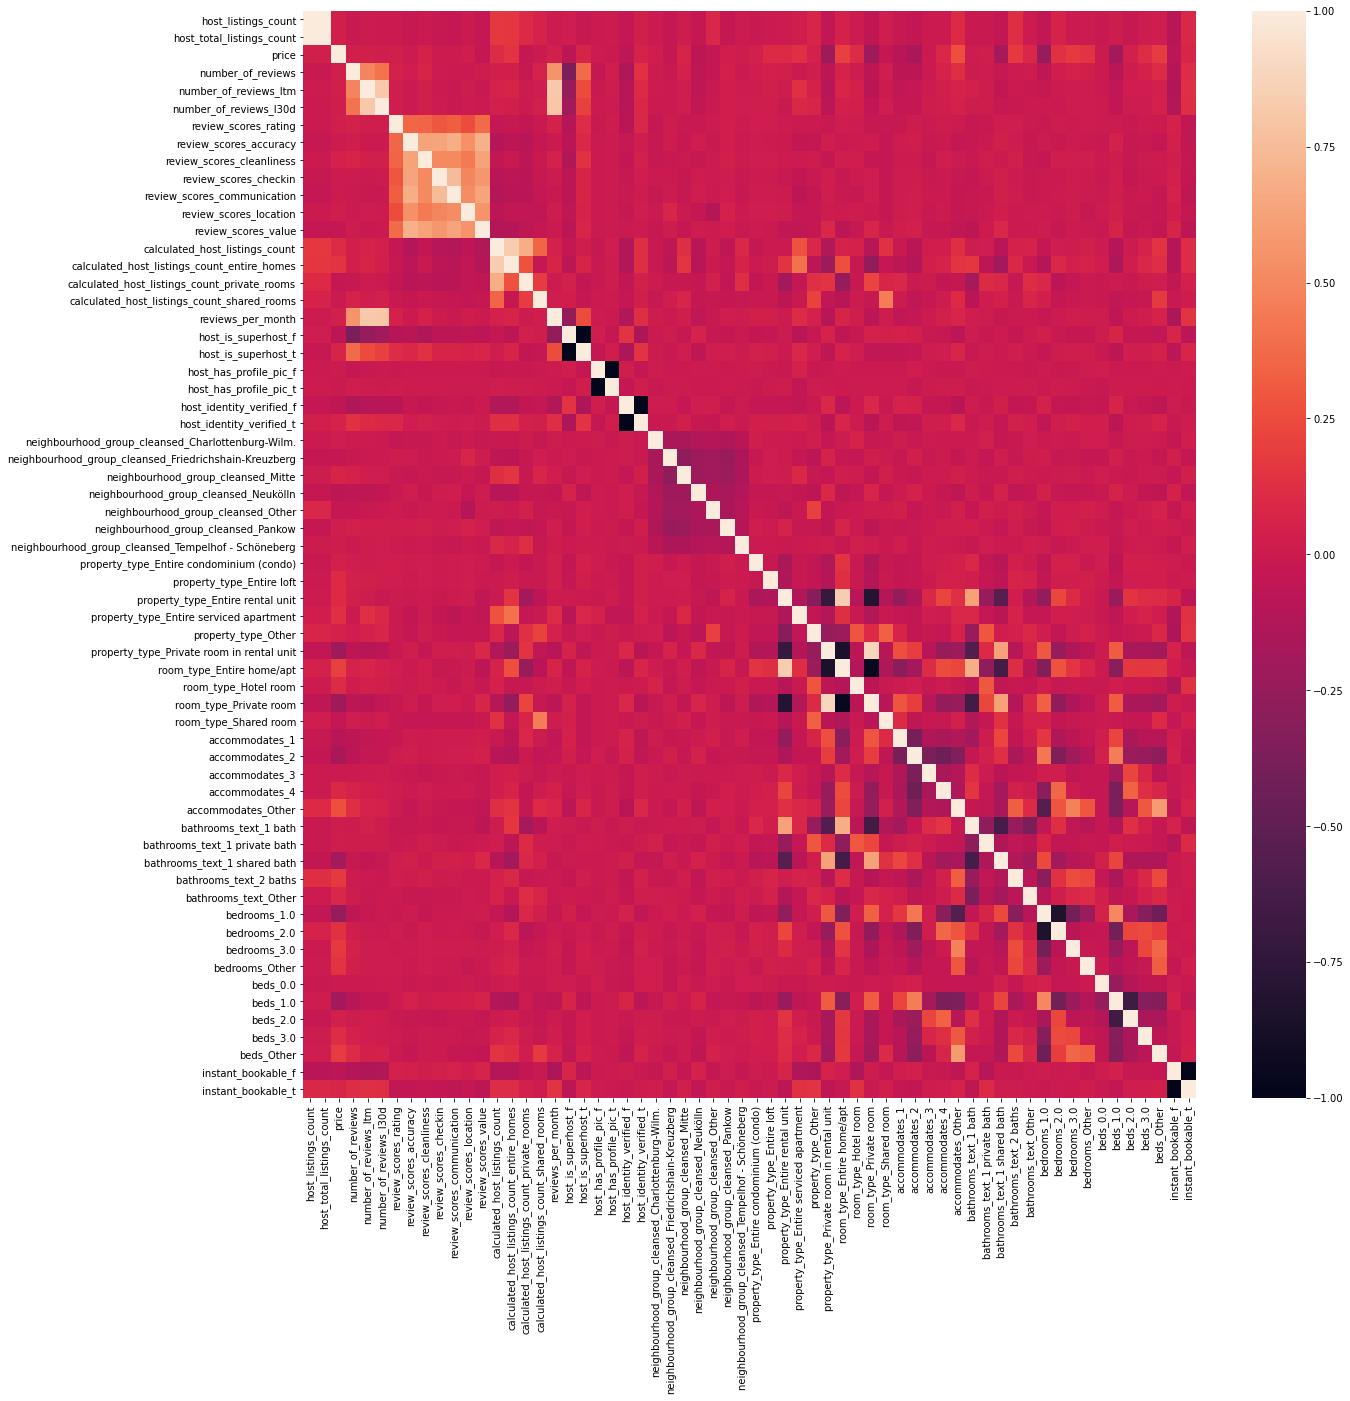

In [619]:
import seaborn as sns
%matplotlib inline

corr = data.corr()

plt.figure(figsize = (20,20))

# plot the heatmap
ax = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [753]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 2)



#Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.00001)
ridge.fit(X_train, y_train) 
print('Ridge Train: ', ridge.score(X_train, y_train))
print('Ridge Test: ', ridge.score(X_test, y_test))

#Lasso Regression:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train) 
print('Lasso Train: ', lasso.score(X_train, y_train))
print('Lasso Test: ', lasso.score(X_test, y_test))

Ridge Train:  0.5337893406985919
Ridge Test:  0.5250635620425059
Lasso Train:  0.012591471429563739
Lasso Test:  0.01851931198632073


In [754]:
#Ridge-ek:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

for i in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000]:
    ridge_pipe = make_pipeline(StandardScaler(), Ridge(alpha=i))
    ridge_pipe.fit(X_train, y_train) 
    print('Alpha is ', i)
    print('Train: ', np.mean((cross_val_score(ridge_pipe, X, y, scoring='r2', cv=5))))
    print('--------------')

Alpha is  1e-05
Train:  0.5274907831932035
--------------
Alpha is  0.0001
Train:  0.5274907835451699
--------------
Alpha is  0.001
Train:  0.5274907870502255
--------------
Alpha is  0.01
Train:  0.5274908206424759
--------------
Alpha is  0.1
Train:  0.527491013287486
--------------
Alpha is  1
Train:  0.5274808560877897
--------------
Alpha is  10
Train:  0.5270624174296266
--------------
Alpha is  100
Train:  0.5259007094781619
--------------
Alpha is  1000
Train:  0.5245628920904428
--------------


In [625]:
from sklearn.linear_model import ElasticNet

elnet = ElasticNet(alpha=1, l1_ratio=0.5)
elnet.fit(X_train, y_train) 
print('Train: ', elnet.score(X_train, y_train))
print('Test: ', elnet.score(X_test, y_test))

Train:  0.06288615097465111
Test:  0.07288652130937168


In [626]:
from sklearn.linear_model import ElasticNet

for a in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    elnet = ElasticNet(alpha=a, l1_ratio=0.5)
    elnet.fit(X_train, y_train)
    print(a,'Test: ', elnet.score(X_test, y_test))

C:\Users\kbogi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1034.670138730878, tolerance: 0.46352150660665403
  model = cd_fast.enet_coordinate_descent(


1e-05 Test:  0.5411701745204164


C:\Users\kbogi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 968.153713787825, tolerance: 0.46352150660665403
  model = cd_fast.enet_coordinate_descent(


0.0001 Test:  0.5412435819329808


C:\Users\kbogi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 536.3113420643693, tolerance: 0.46352150660665403
  model = cd_fast.enet_coordinate_descent(


0.001 Test:  0.5414291980313073
0.01 Test:  0.5166897649472805
0.1 Test:  0.3428318064236521
1 Test:  0.07288652130937168
10 Test:  -0.0009178148199593394


C:\Users\kbogi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6586178746706537, tolerance: 0.46352150660665403
  model = cd_fast.enet_coordinate_descent(


In [627]:
for r in [0.00001, 0.1, 0.25, 0.5, 0.75, 0.85, 0.9, 1]:
    elnet = ElasticNet(alpha=0.001, l1_ratio=r)
    elnet.fit(X_train, y_train)
    print(r,'Test: ', elnet.score(X_test, y_test))

C:\Users\kbogi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1049.2617394670856, tolerance: 0.46352150660665403
  model = cd_fast.enet_coordinate_descent(


1e-05 Test:  0.5414558656799978


C:\Users\kbogi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877.6658955328494, tolerance: 0.46352150660665403
  model = cd_fast.enet_coordinate_descent(


0.1 Test:  0.5414484388490327


C:\Users\kbogi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 704.1222502305966, tolerance: 0.46352150660665403
  model = cd_fast.enet_coordinate_descent(


0.25 Test:  0.5414345529987714


C:\Users\kbogi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 536.3113420643693, tolerance: 0.46352150660665403
  model = cd_fast.enet_coordinate_descent(


0.5 Test:  0.5414291980313073


C:\Users\kbogi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 443.4209788621156, tolerance: 0.46352150660665403
  model = cd_fast.enet_coordinate_descent(


0.75 Test:  0.5413186319021079


C:\Users\kbogi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418.2964824902274, tolerance: 0.46352150660665403
  model = cd_fast.enet_coordinate_descent(


0.85 Test:  0.5412289912995165


C:\Users\kbogi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 408.0830106669828, tolerance: 0.46352150660665403
  model = cd_fast.enet_coordinate_descent(


0.9 Test:  0.5411761821089229
1 Test:  0.5410435522559454


C:\Users\kbogi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 392.6015817574761, tolerance: 0.46352150660665403
  model = cd_fast.enet_coordinate_descent(


In [758]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import cohen_kappa_score

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test)
#overfitted on the train

(0.9068926109571352, 0.5300060705523986)

In [628]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0, n_estimators=100)

reg.fit(X_train, y_train)
reg.score(X_train, y_train), reg.score(X_test, y_test)

(0.6019199216652389, 0.5668066457760241)

# Save model

In [629]:
import pickle
# save
pickle.dump(reg, open('Winner_model', 'wb'))

# load
gb_loaded = pickle.load(open('Winner_model', 'rb'))

gb_loaded.score(X, y)

0.593564239177804

In [631]:

import xgboost as xgb
model = xgb.XGBRegressor(random_state=0)
model.fit(X, y)
model.score(X, y)

file_name = "xgb_reg.pkl"
# save
pickle.dump(model, open(file_name, "wb"))
# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))
xgb_model_loaded.score(X, y)

0.7749472446212917

# Test data

In [707]:
data_test = pd.read_csv('berlin_test_raw.csv')
data_test
#4.5k/13.7k

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,8,21869,https://www.airbnb.com/rooms/21869,20210921151214,2021-09-22,Studio in the Heart of Kreuzberg,Light and sunny 1-Room-turn of the century-fla...,Our Part of Kreuzberg is just the best. Good v...,https://a0.muscache.com/pictures/435605/4e86bb...,64696,...,4.58,4.62,4.58,NaN,f,2,2,0,0,0.56
1,9,22438,https://www.airbnb.com/rooms/22438,20210921151214,2021-09-22,WOHNUNG IN BERLIN ★ MITTE,Free Internet and phone included.<br /><br />A...,NaN,https://a0.muscache.com/pictures/a1b801aa-db65...,86159,...,4.73,4.62,4.69,NaN,f,1,1,0,0,1.50
2,13,26543,https://www.airbnb.com/rooms/26543,20210921151214,2021-09-22,Helmholtzplatz Bright&Spacious Apt.,2 rooms apartment for long term let<br /><br ...,Vibes and full of lovely cafes and bistros and...,https://a0.muscache.com/pictures/100083159/6dd...,112675,...,4.72,4.83,4.42,BD Wohn C 6 - 03/z/za/002795 - 17,f,2,1,1,0,1.84
3,14,28156,https://www.airbnb.com/rooms/28156,20210921151214,2021-09-22,Beautiful apartment in Prenzlauer Berg,The apartment is located on the upper ground f...,NaN,https://a0.muscache.com/pictures/508550/1f0ea8...,55531,...,4.97,4.68,4.27,NaN,f,3,3,0,0,0.34
4,15,29279,https://www.airbnb.com/rooms/29279,20210921151214,2021-09-22,Quiet 2 rooms next Helmholtzplatz,This charming apartment located in a building ...,Prenzlauer Berg is no doubt one of the most my...,https://a0.muscache.com/pictures/ec8c12ef-85f5...,54283,...,4.82,4.92,4.66,NaN,f,3,3,0,0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,18270,52342695,https://www.airbnb.com/rooms/52342695,20210921151214,2021-09-22,Wohnung näher Eisenacher Kiez,Kleine minimalistische Wohnung und grünem Hint...,NaN,https://a0.muscache.com/pictures/d4f5c5f5-cfcb...,421574436,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
4568,18272,52344075,https://www.airbnb.com/rooms/52344075,20210921151214,2021-09-22,Apartment-Berlin-Prenzlauerberg,"Hello,<br />i am renting out my apartment whil...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,423662405,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
4569,18275,52347379,https://www.airbnb.com/rooms/52347379,20210921151214,2021-09-22,Schönes Altbauzimmer mitten in Neukölln,Wir sind gerade erst in der Wohnung eingezogen...,NaN,https://a0.muscache.com/pictures/638091d0-e920...,100203443,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
4570,18286,52369960,https://www.airbnb.com/rooms/52369960,20210921151214,2021-09-22,In the Heart of Prenzlauer Berg,This cozy apartment is situated in the best pa...,NaN,https://a0.muscache.com/pictures/4eec07bf-af8e...,156936686,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN


Preprocessing

In [708]:
data=data_test
missing = data.isna().sum() 
missing

Unnamed: 0                                         0
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               9
description                                      142
neighborhood_overview                           2216
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          2
host_since                                         2
host_location                                     14
host_about                                      2346
host_response_time                              2501
host_response_rate                              2501
host_acceptance_rate                            2324
host_is_superhost                             

In [709]:
data = data.drop(columns=['Unnamed: 0','listing_url','scrape_id','last_scraped','name','host_about','bathrooms','id','neighborhood_overview','license','host_verifications','longitude','latitude','first_review','last_review','amenities','host_since'])
data = data.drop(columns=['description','picture_url','host_id','host_url','host_name','host_location','host_thumbnail_url','host_picture_url','host_response_time','host_acceptance_rate','host_response_rate','neighbourhood','host_neighbourhood'])

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df2=data.select_dtypes(include=numerics)

df3=data.select_dtypes(include=['object'])

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df2['host_listings_count'].values.reshape(-1, 1))
new = imp.transform(df2['host_listings_count'].values.reshape(-1, 1))
data['host_listings_count']=new

imp.fit(df2['host_total_listings_count'].values.reshape(-1, 1))
new = imp.transform(df2['host_total_listings_count'].values.reshape(-1, 1))
data['host_total_listings_count']=new

imp.fit(df2['review_scores_rating'].values.reshape(-1, 1))
new = imp.transform(df2['review_scores_rating'].values.reshape(-1, 1))
data['review_scores_rating']=new

imp.fit(df2['review_scores_value'].values.reshape(-1, 1))
new = imp.transform(df2['review_scores_value'].values.reshape(-1, 1))
data['review_scores_value']=new

imp.fit(df2['review_scores_accuracy'].values.reshape(-1, 1))
new = imp.transform(df2['review_scores_accuracy'].values.reshape(-1, 1))
data['review_scores_accuracy']=new

imp.fit(df2['review_scores_cleanliness'].values.reshape(-1, 1))
new = imp.transform(df2['review_scores_cleanliness'].values.reshape(-1, 1))
data['review_scores_cleanliness']=new

imp.fit(df2['review_scores_checkin'].values.reshape(-1, 1))
new = imp.transform(df2['review_scores_checkin'].values.reshape(-1, 1))
data['review_scores_checkin']=new

imp.fit(df2['review_scores_communication'].values.reshape(-1, 1))
new = imp.transform(df2['review_scores_communication'].values.reshape(-1, 1))
data['review_scores_communication']=new

imp.fit(df2['review_scores_location'].values.reshape(-1, 1))
new = imp.transform(df2['review_scores_location'].values.reshape(-1, 1))
data['review_scores_location']=new

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df2[['number_of_reviews', 'reviews_per_month']])
new = imp.transform(df2[['number_of_reviews', 'reviews_per_month']])
data[['number_of_reviews', 'reviews_per_month']]=pd.DataFrame(new)


vcs = pd.DataFrame(df2['accommodates'].value_counts())
TH = 150 #more than 5 people (0: 4??? other)
other_list = vcs[vcs.accommodates<TH].index.tolist()
temp_col = df2['accommodates'].copy()
temp_col.loc[temp_col.isin(other_list)] = 'Other'
temp_col
data['accommodates']=temp_col #categorical

vcs = pd.DataFrame(df2['bedrooms'].value_counts())
TH = 150 #more than 3 bedrooms
other_list = vcs[vcs.bedrooms<TH].index.tolist()
temp_col = df2['bedrooms'].copy()
temp_col.loc[temp_col.isin(other_list)] = 'Other'
data['bedrooms']=temp_col #categorical
#print(f"'{'bedrooms'}':\n", data['bedrooms'].value_counts())
#print(f"'{'beds'}':\n", data['beds'].value_counts())

vcs = pd.DataFrame(df3['bathrooms_text'].value_counts())
TH = 150 #more than 5 people (0: 4??? other)
other_list = vcs[vcs.bathrooms_text<TH].index.tolist()
temp_col = df3['bathrooms_text'].copy()
temp_col.loc[temp_col.isin(other_list)] = 'Other'
data['bathrooms_text']=temp_col

data['beds']=data['beds'].fillna(1)
data['bathrooms_text']=data['bathrooms_text'].fillna('1 bath')
data['bedrooms']=data['bedrooms'].fillna(1)
#most frequent
#0: no bed? 

vcs = pd.DataFrame(df2['beds'].value_counts())
TH = 150
other_list = vcs[vcs.beds<TH].index.tolist()
temp_col = df2['beds'].copy()
temp_col.loc[temp_col.isin(other_list)] = 'Other'
data['beds']=temp_col #categorical
print(f"'{'beds'}':\n", data['beds'].value_counts())


data['host_identity_verified']=data['host_identity_verified'].fillna('t')
data['host_has_profile_pic']=data['host_has_profile_pic'].fillna('t')
data['host_is_superhost']=data['host_is_superhost'].fillna('f')

vcs = pd.DataFrame(df3['neighbourhood_group_cleansed'].value_counts())
TH = 150
other_list = vcs[vcs['neighbourhood_group_cleansed']<TH].index.tolist()
temp_col = df3['neighbourhood_group_cleansed'].copy()
temp_col.loc[temp_col.isin(other_list)] = 'Other'
data['neighbourhood_group_cleansed']=temp_col

vcs = pd.DataFrame(df3['property_type'].value_counts())
TH = 250
other_list = vcs[vcs.property_type<TH].index.tolist()
temp_col = df3['property_type'].copy()
temp_col.loc[temp_col.isin(other_list)] = 'Other'
data['property_type']=temp_col
temp_col
data = data.drop(columns=['neighbourhood_cleansed'])

'beds':
 1.0      2702
2.0      1018
3.0       342
0.0       166
4.0       153
Other     145
Name: beds, dtype: int64


In [710]:
df2

,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4.0,4.0,4,1.0,2.0,60,0,0,4.74,4.70,4.91,4.77,4.58,4.62,4.58,2,2,0,0,0.56
1,0.0,0.0,2,2.0,4.0,181,1,0,4.70,4.76,4.69,4.82,4.73,4.62,4.69,1,1,0,0,1.50
2,3.0,3.0,6,1.0,2.0,188,0,0,4.62,4.59,4.53,4.61,4.72,4.83,4.42,2,1,1,0,1.84
3,4.0,4.0,1,NaN,1.0,33,1,0,4.65,4.74,4.84,4.87,4.97,4.68,4.27,3,3,0,0,0.34
4,3.0,3.0,4,2.0,3.0,77,2,0,4.80,4.86,4.85,4.88,4.82,4.92,4.66,3,3,0,0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,0.0,0.0,2,1.0,1.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN
4568,0.0,0.0,1,1.0,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN
4569,2.0,2.0,2,1.0,1.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,NaN
4570,4.0,4.0,6,2.0,5.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0,0,NaN


In [713]:
df2=data.select_dtypes(include=numerics)
df3=data.select_dtypes(include=['object']) #null oszlopú
X_test= df2.join(pd.get_dummies(df3))

In [714]:
X_test

,host_listings_count,host_total_listings_count,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,...,bedrooms_2.0,bedrooms_Other,beds_0.0,beds_1.0,beds_2.0,beds_3.0,beds_4.0,beds_Other,instant_bookable_f,instant_bookable_t
0,4.0,4.0,60.0,0,0,4.74,4.70,4.91,4.77,4.58,...,0,0,0,0,1,0,0,0,1,0
1,0.0,0.0,181.0,1,0,4.70,4.76,4.69,4.82,4.73,...,1,0,0,0,0,0,1,0,1,0
2,3.0,3.0,188.0,0,0,4.62,4.59,4.53,4.61,4.72,...,0,0,0,0,1,0,0,0,1,0
3,4.0,4.0,33.0,1,0,4.65,4.74,4.84,4.87,4.97,...,0,0,0,1,0,0,0,0,1,0
4,3.0,3.0,77.0,2,0,4.80,4.86,4.85,4.88,4.82,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,0.0,0.0,0.0,0,0,4.85,4.93,4.80,4.96,4.97,...,0,0,0,1,0,0,0,0,0,1
4568,0.0,0.0,0.0,0,0,4.85,4.93,4.80,4.96,4.97,...,0,0,1,0,0,0,0,0,0,1
4569,2.0,2.0,0.0,0,0,4.85,4.93,4.80,4.96,4.97,...,0,0,0,1,0,0,0,0,1,0
4570,4.0,4.0,0.0,0,0,4.85,4.93,4.80,4.96,4.97,...,1,0,0,0,0,0,0,1,0,1


In [717]:
predlog = reg.predict(X_test)
pred=pd.DataFrame(np.exp(predlog))
print(pred.describe())

                 0
count  4572.000000
mean    119.824453
std      41.122400
min      35.532984
25%      87.323937
50%     114.458875
75%     138.015910
max     439.052612


In [759]:
pred.to_csv('test_pred_berlin.csv', index=False)